<a href="https://colab.research.google.com/github/kawin-pixel/real_estate_th/blob/main/Real_estate_TH_200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [ ]:
library(dbplyr)
library(ggplot2)
library(tidyverse)

data <- read.csv("/content/ddproperty_2022-04-19.csv")

##source: https://www.kaggle.com/datasets/polartech/200k-homes-for-sale-in-thailand

In [ ]:
summary(data)

 sub_property_type   agent_name         living_space     land_space_raw    
 Length:220557      Length:220557      Min.   :      1   Length:220557     
 Class :character   Class :character   1st Qu.:     35   Class :character  
 Mode  :character   Mode  :character   Median :     63   Mode  :character  
                                       Mean   :    393                     
                                       3rd Qu.:    150                     
                                       Max.   :6000000                     
                                       NA's   :32087                       
 price_per_unit       price_max         searched_field     bathroom_number 
 Length:220557      Min.   :0.000e+00   Length:220557      Min.   :  0.00  
 Class :character   1st Qu.:2.900e+06   Class :character   1st Qu.:  1.00  
 Mode  :character   Median :5.640e+06   Mode  :character   Median :  2.00  
                    Mean   :4.577e+07                      Mean   :  2.01  
            

In [ ]:
## calculate price to sqm for condo

data <- data %>% mutate (price_sqm_condo = ifelse(data$property_type == "Condo", data$price / data$living_space, NA))

data$proprety_age_class <- case_when(
        data$built_year > 0 & data$built_year < 2014   ~ "10 year or more",
        data$built_year > 2014 ~ "Less than 10 yr",
        TRUE ~ NA_character_
        )


data$count <- 1

summary(data)
tibble(data)
unique(data$property_type)
unique(data$state)
unique(data$proprety_age_class)

fivenum(data$price_sqm_condo)

 sub_property_type   agent_name         living_space     land_space_raw    
 Length:220557      Length:220557      Min.   :      1   Length:220557     
 Class :character   Class :character   1st Qu.:     35   Class :character  
 Mode  :character   Mode  :character   Median :     63   Mode  :character  
                                       Mean   :    393                     
                                       3rd Qu.:    150                     
                                       Max.   :6000000                     
                                       NA's   :32087                       
 price_per_unit       price_max         searched_field     bathroom_number 
 Length:220557      Min.   :0.000e+00   Length:220557      Min.   :  0.00  
 Class :character   1st Qu.:2.900e+06   Class :character   1st Qu.:  1.00  
 Mode  :character   Median :5.640e+06   Mode  :character   Median :  2.00  
                    Mean   :4.577e+07                      Mean   :  2.01  
            

#Condo analysis

## Condo price / sqm by district in BKK

Warning message:
“Removed 6532 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


95% 
290400

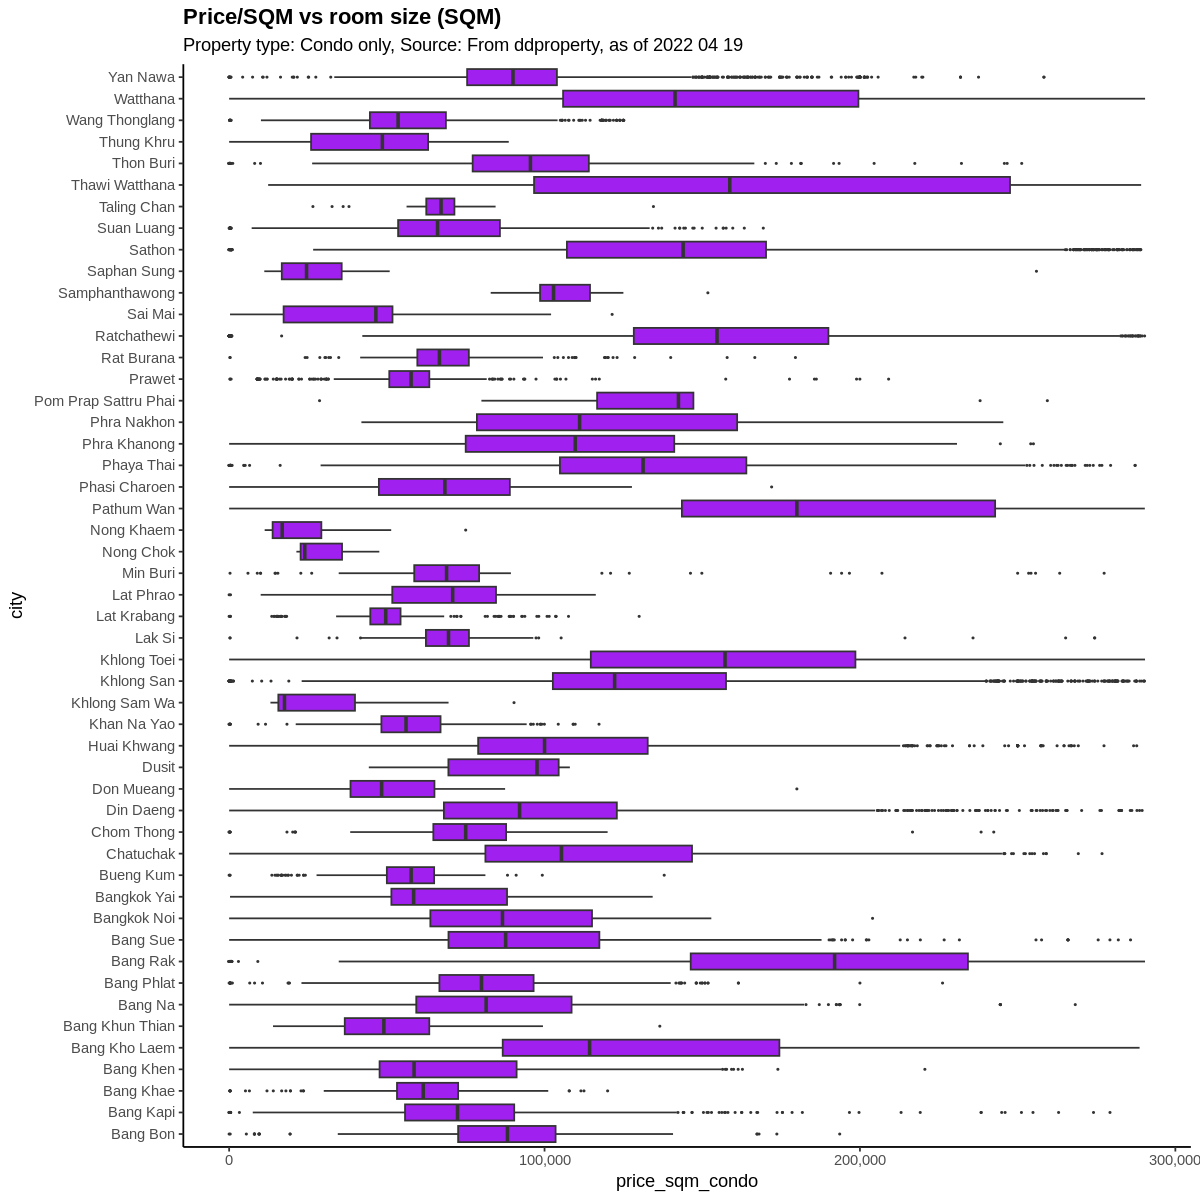

In [ ]:
#supply overview

##condo price / sqm by district in BKK
options(repr.plot.width=10, repr.plot.height=10, dpi = 600)

ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = city)) +
  geom_boxplot( fill = "purple", outlier.size = 0.2) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Price/SQM vs room size (SQM)",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")


quantile(data$price_sqm_condo, 0.95, na.rm = T)

## Condo price / sqm in BKK

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


95% 
290400

95% 
475

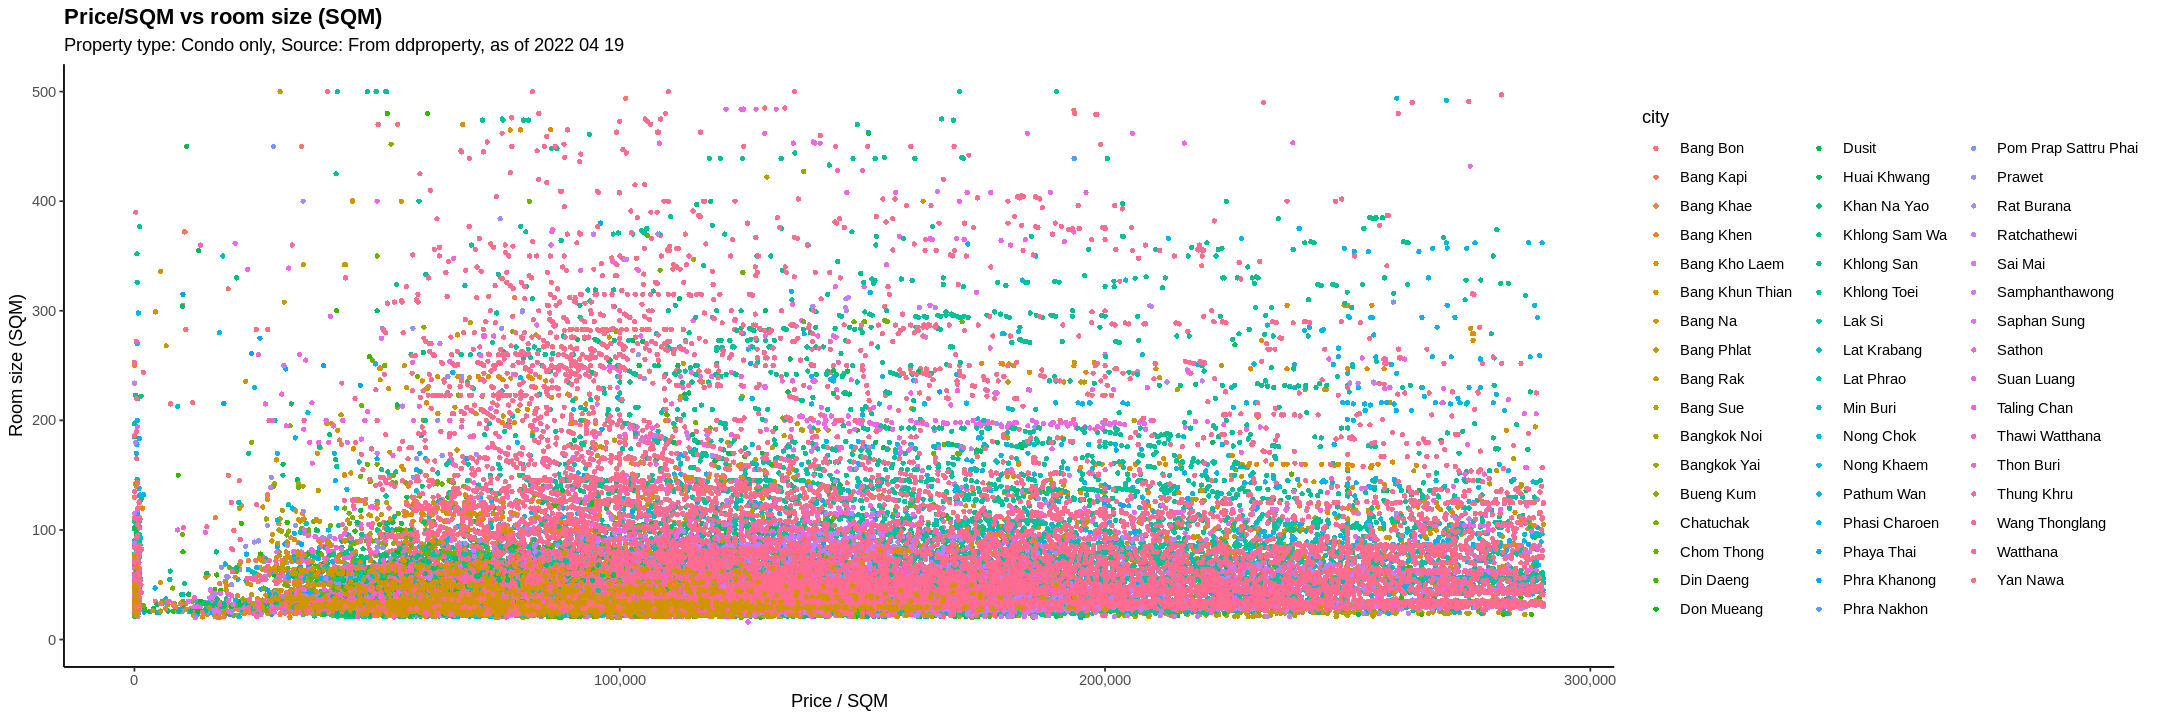

In [ ]:
options(repr.plot.width=18, repr.plot.height=6, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = city)) +
  geom_point(shape = 21,
              stroke = NA) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        title = "Price/SQM vs room size (SQM)",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")

quantile(data$price_sqm_condo, 0.95, na.rm = T)
quantile(data$living_space, 0.95, na.rm = T)

##Room size vs price breakdown by BKK district

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


90% 
234042.6

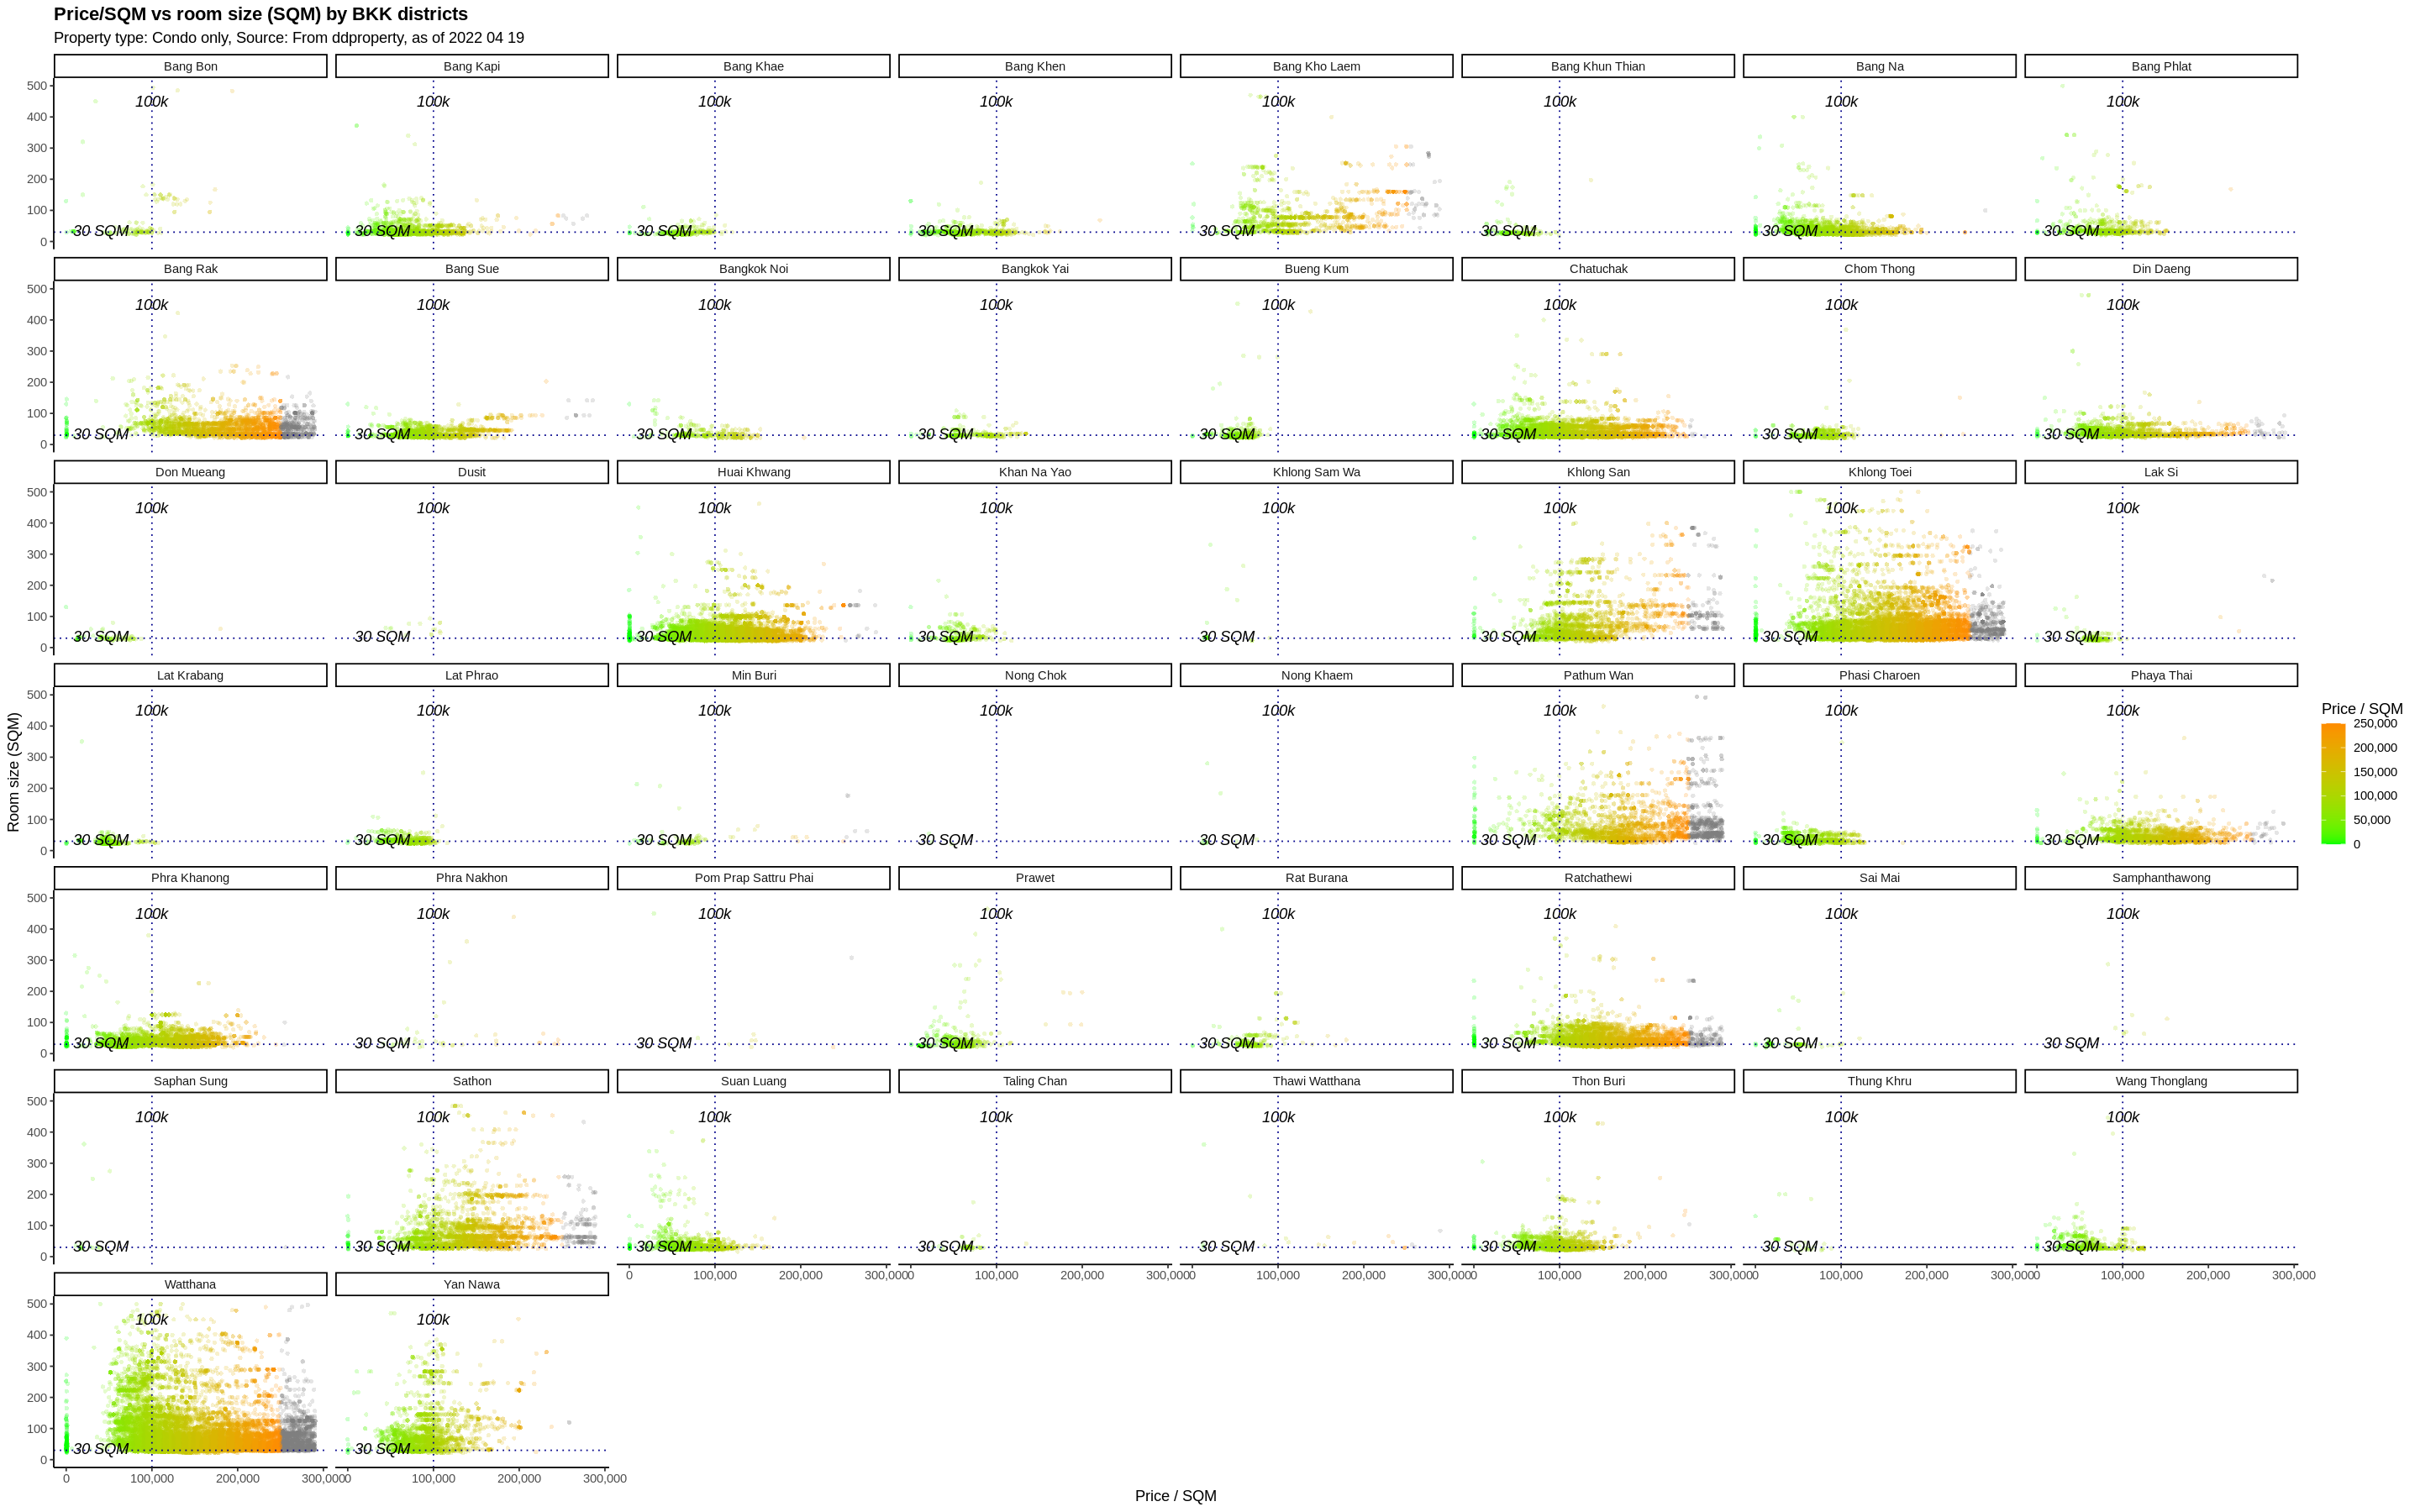

In [ ]:
options(repr.plot.width=24, repr.plot.height=15, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = price_sqm_condo)) +
  geom_point(shape = 21, stroke = NA, alpha = 0.2) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +

  geom_hline(yintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 100000, y = 450, label = "100k", fontface = "italic") +

  geom_vline(xintercept = 100000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 40000, y = 35, label = "30 SQM", fontface = "italic") +

  scale_fill_gradient(high = "darkorange", low = "green",
                      limits = c(0,250000),
                      labels = scales::comma) +
  facet_wrap(~ city) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        fill = "Price / SQM",
        title = "Price/SQM vs room size (SQM) by BKK districts",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")
quantile(data$price_sqm_condo, 0.90, na.rm = T)

## About Condo age

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


90% 
234042.6

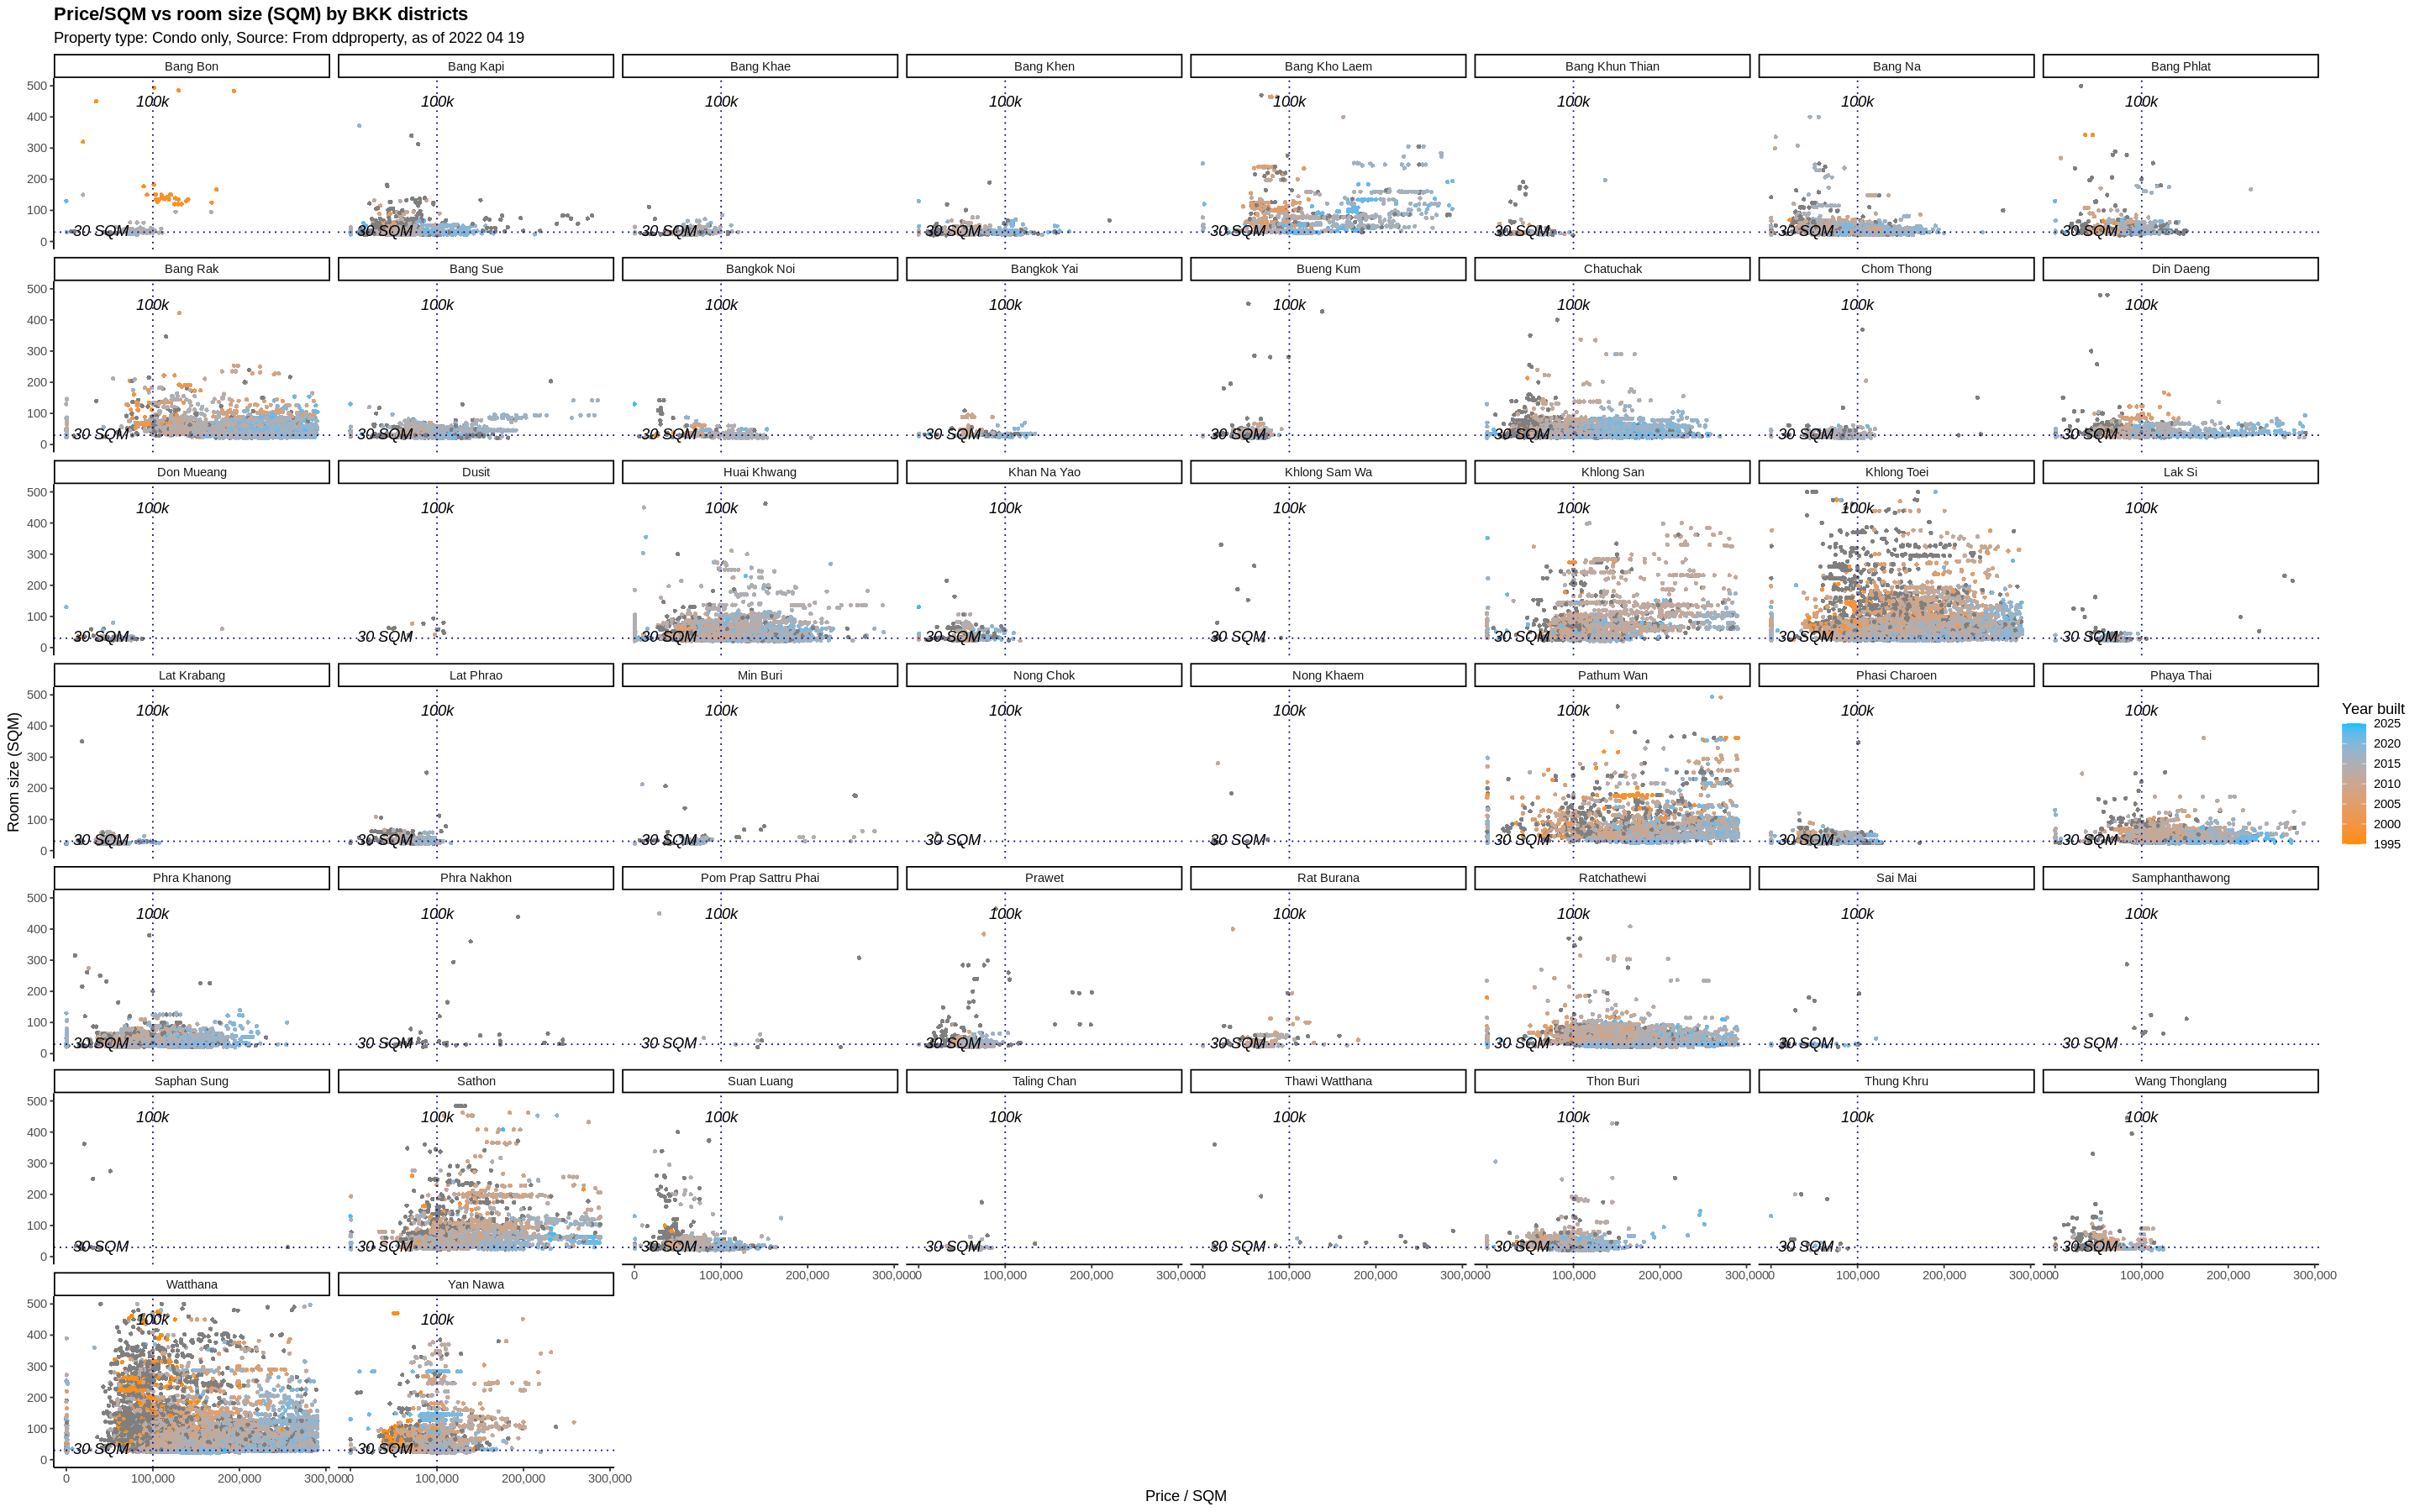

In [ ]:
options(repr.plot.width=24, repr.plot.height=15, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = built_year)) +
  geom_point(shape = 21, stroke = NA, alpha = 1) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +

  geom_hline(yintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 100000, y = 450, label = "100k", fontface = "italic") +

  geom_vline(xintercept = 100000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 40000, y = 35, label = "30 SQM", fontface = "italic") +

  scale_fill_gradient(high = "deepskyblue", low = "darkorange",
                      limits = c(1995,2025))+

  facet_wrap(~ city) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        fill = "Year built",
        title = "Price/SQM vs room size (SQM) by BKK districts",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")
quantile(data$price_sqm_condo, 0.90, na.rm = T)

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


90% 
234042.6

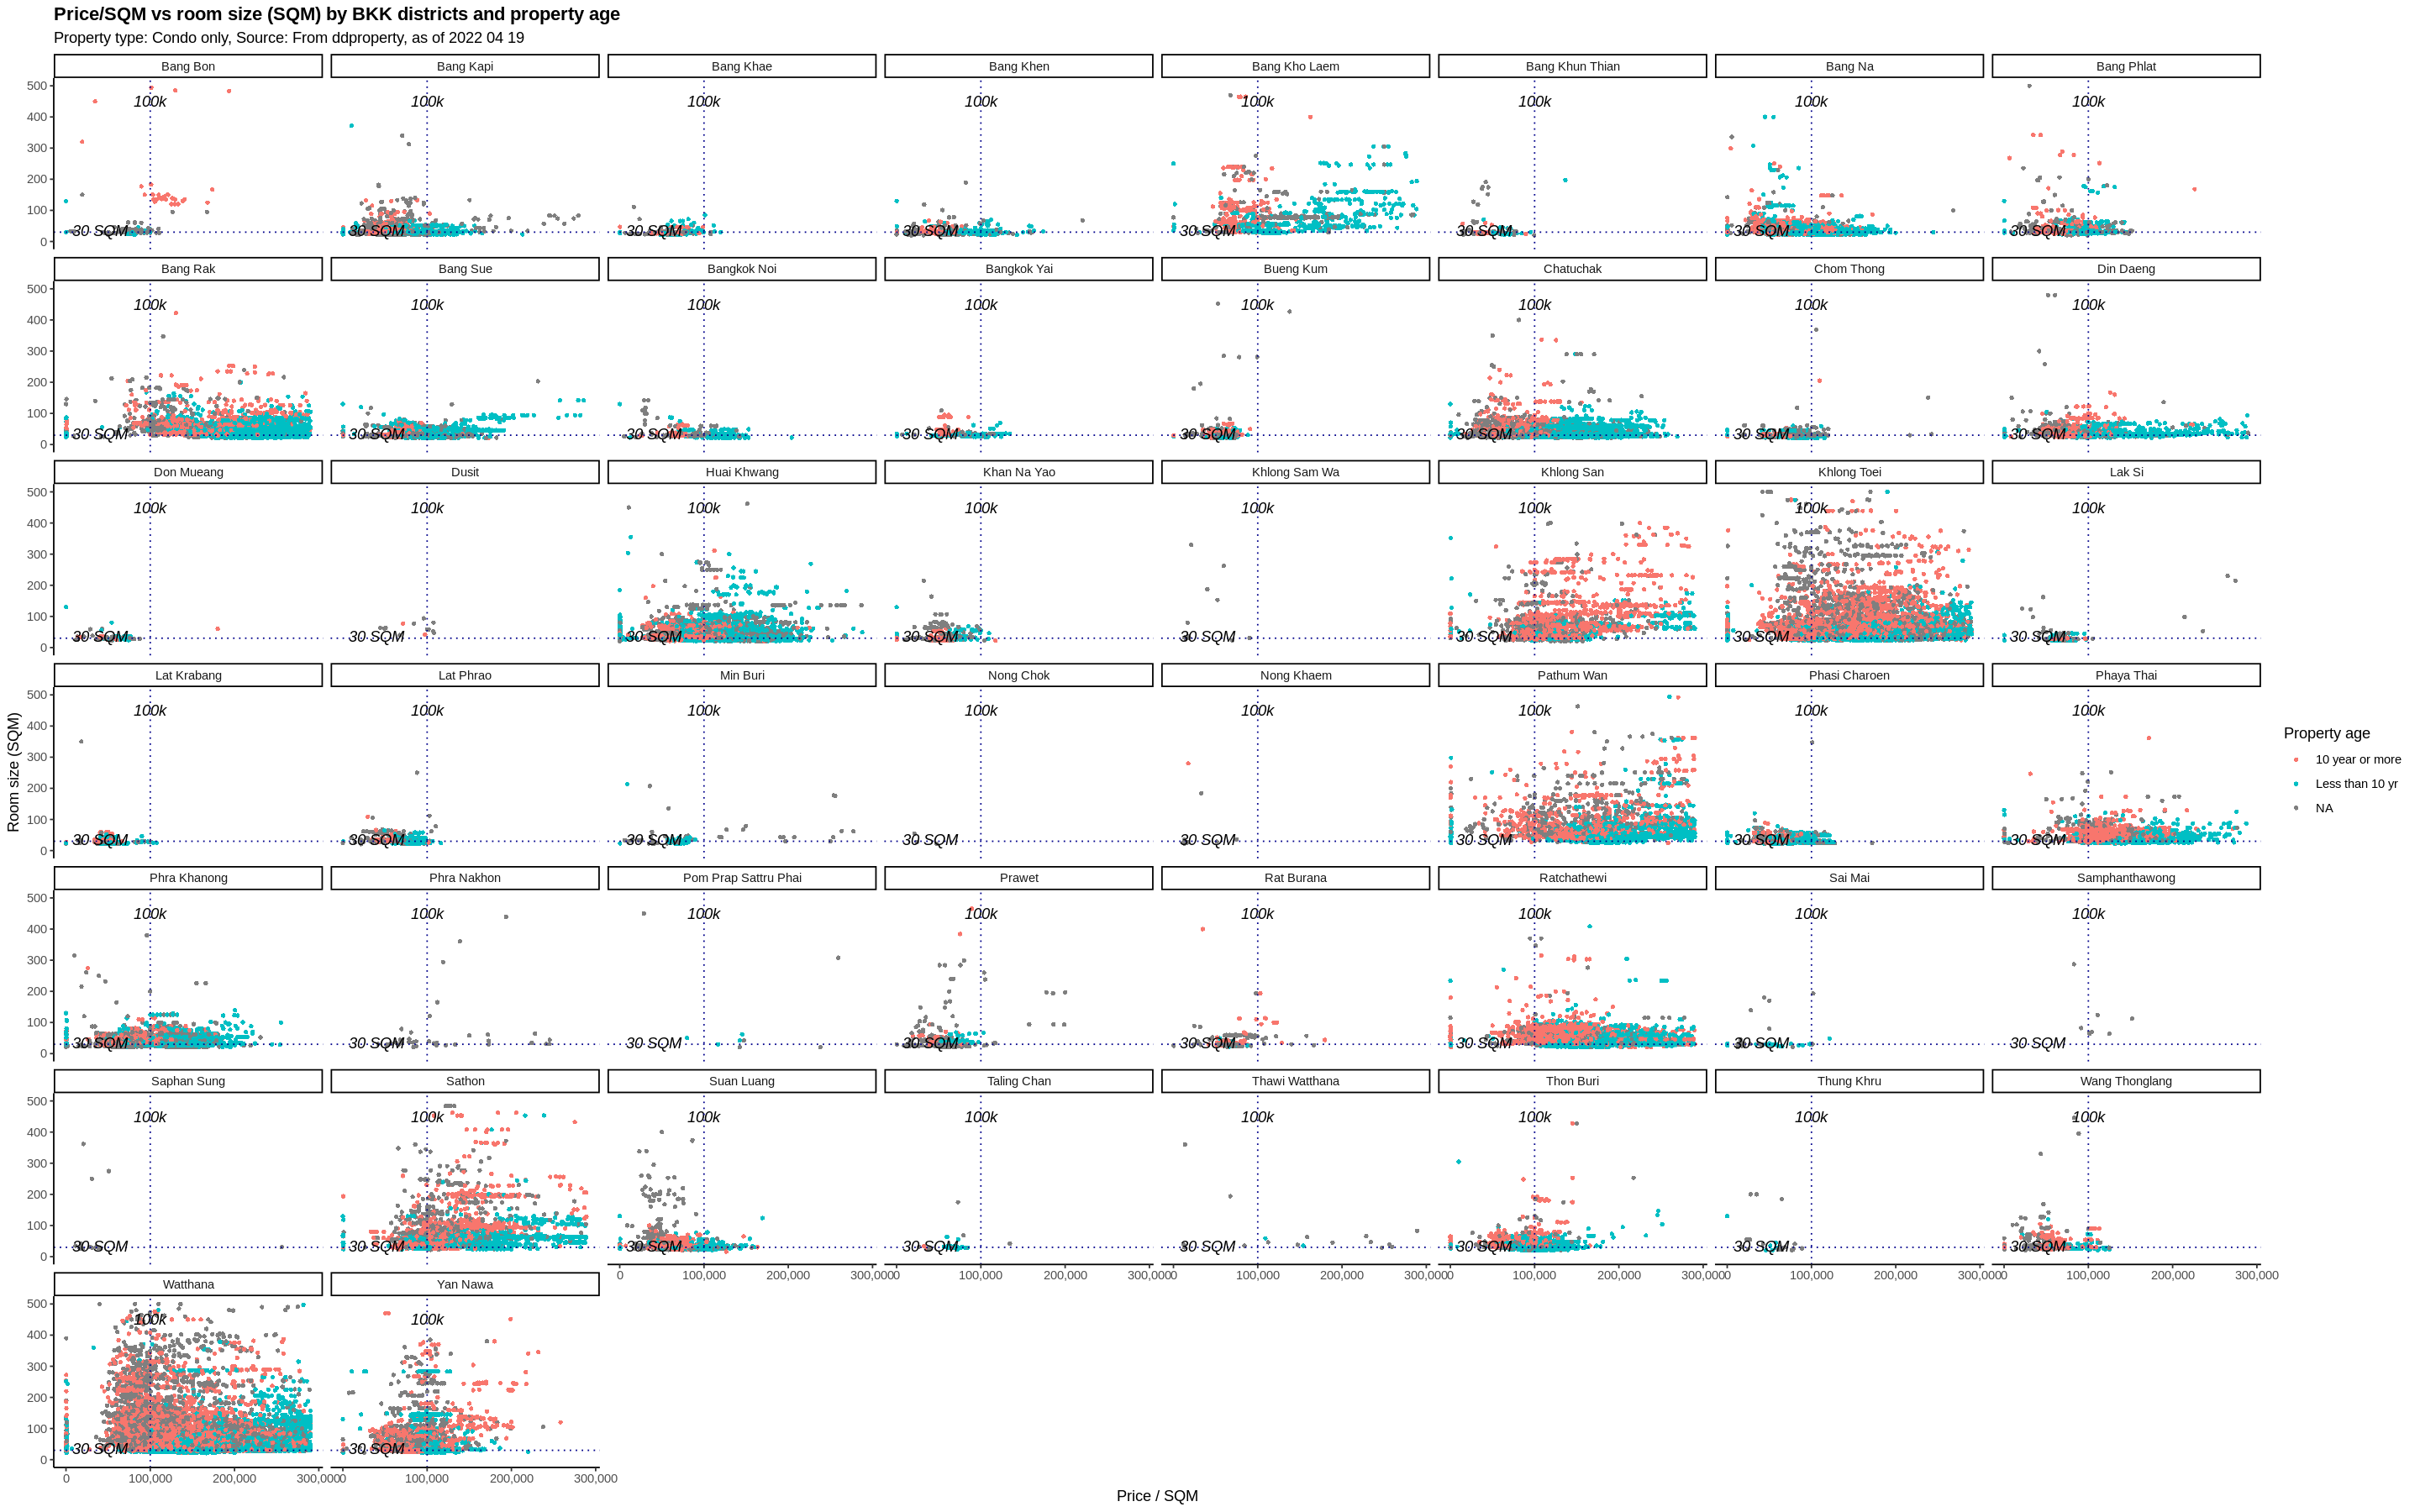

In [ ]:
options(repr.plot.width=24, repr.plot.height=15, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = proprety_age_class)) +
  geom_point(shape = 21, stroke = NA, alpha = 1) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +

  geom_hline(yintercept = 30, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 100000, y = 450, label = "100k", fontface = "italic") +

  geom_vline(xintercept = 100000, color = "darkblue",  linetype = "dotted") +
  annotate ("text", x = 40000, y = 35, label = "30 SQM", fontface = "italic") +

  facet_wrap(~ city) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        fill = "Property age",
        title = "Price/SQM vs room size (SQM) by BKK districts and property age",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")
quantile(data$price_sqm_condo, 0.90, na.rm = T)

# All property types

Warning message:
“Removed 10278 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


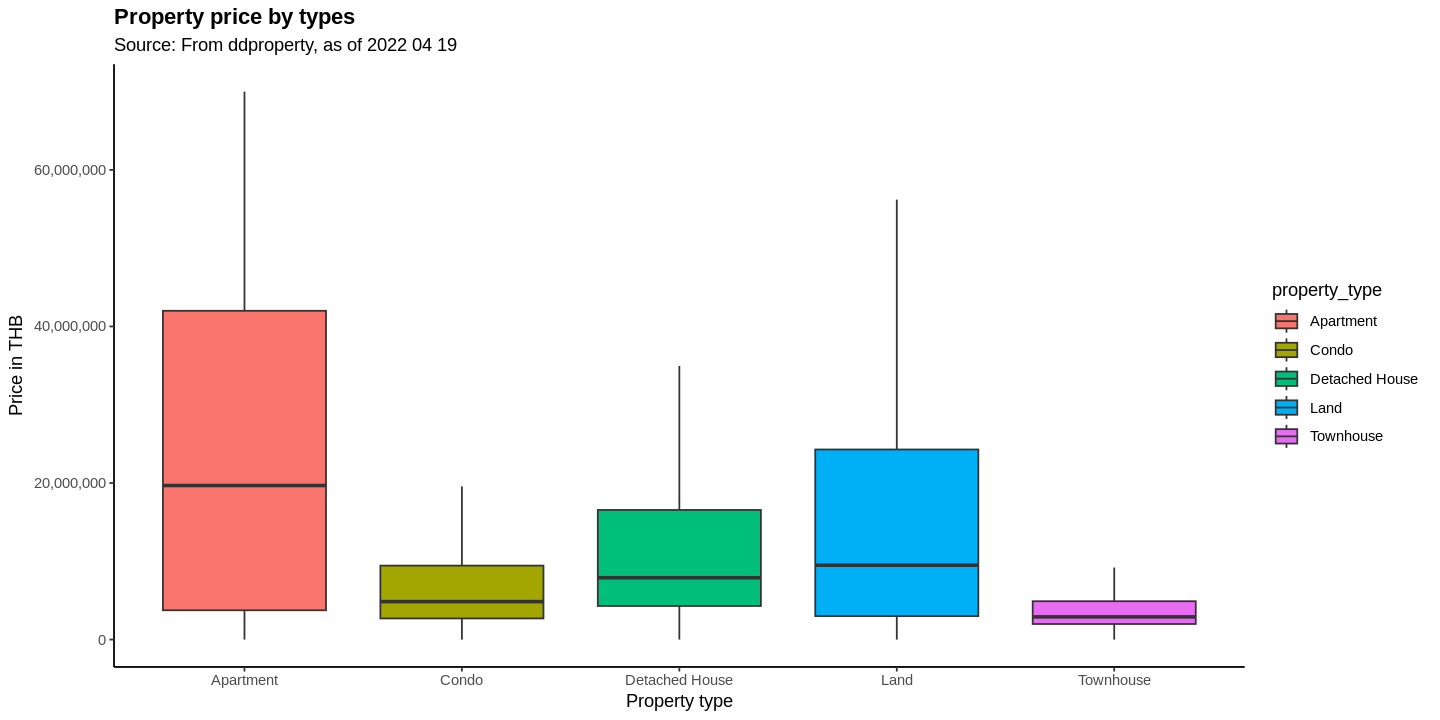

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6, dpi = 600)

ggplot(data, mapping = aes(y = price, x = property_type, fill = property_type)) +
  geom_boxplot(outlier.shape = NA) +
  scale_y_continuous(limits = c(0,70000000), ##price quantile 0.95 = 67m THB
                     labels = scales::comma) +

##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Property type",
        y = "Price in THB",
        title = "Property price by types",
        subtitle = "Source: From ddproperty, as of 2022 04 19 ")

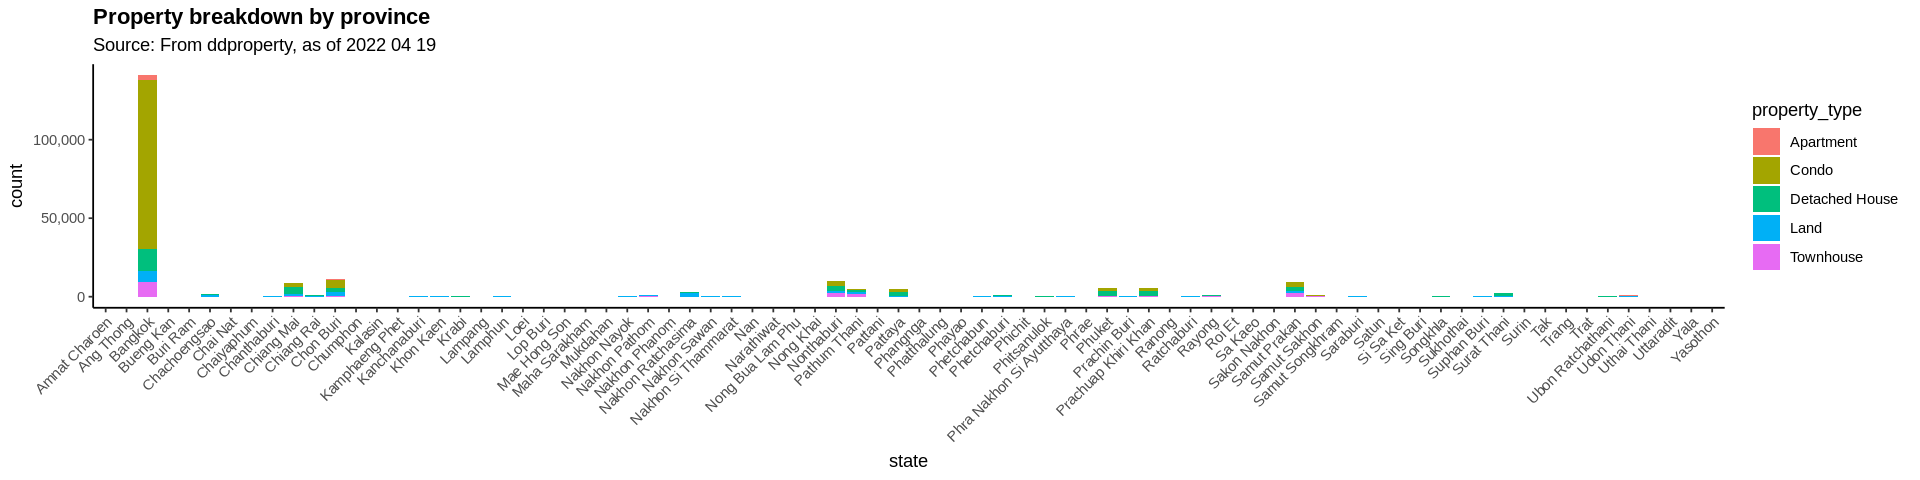

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 4, dpi = 600)

ggplot(data, mapping = aes(y = state, fill = property_type)) +
  geom_bar() +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +

##theme and label
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( title = "Property breakdown by province",
        subtitle = "Source: From ddproperty, as of 2022 04 19 ")

# For-sell market overtime

In [ ]:
# For-sell market overtime

## create new date column
data <- data %>% mutate(
  new_updated_date = as.Date(data$last_updated)
)

head(data$new_updated_date,10)

d.by_date <- data %>% group_by (new_updated_date) %>%
  summarise(total_count = sum(count), total_price = sum(price))

head(d.by_date)

new_updated_date,total_count,total_price
<date>,<dbl>,<dbl>
2022-01-26,2,9280000
2022-02-22,1,312300000
2022-02-24,1,1380000
2022-02-28,1,3190000
2022-03-01,2,7406100
2022-03-04,2,16980000


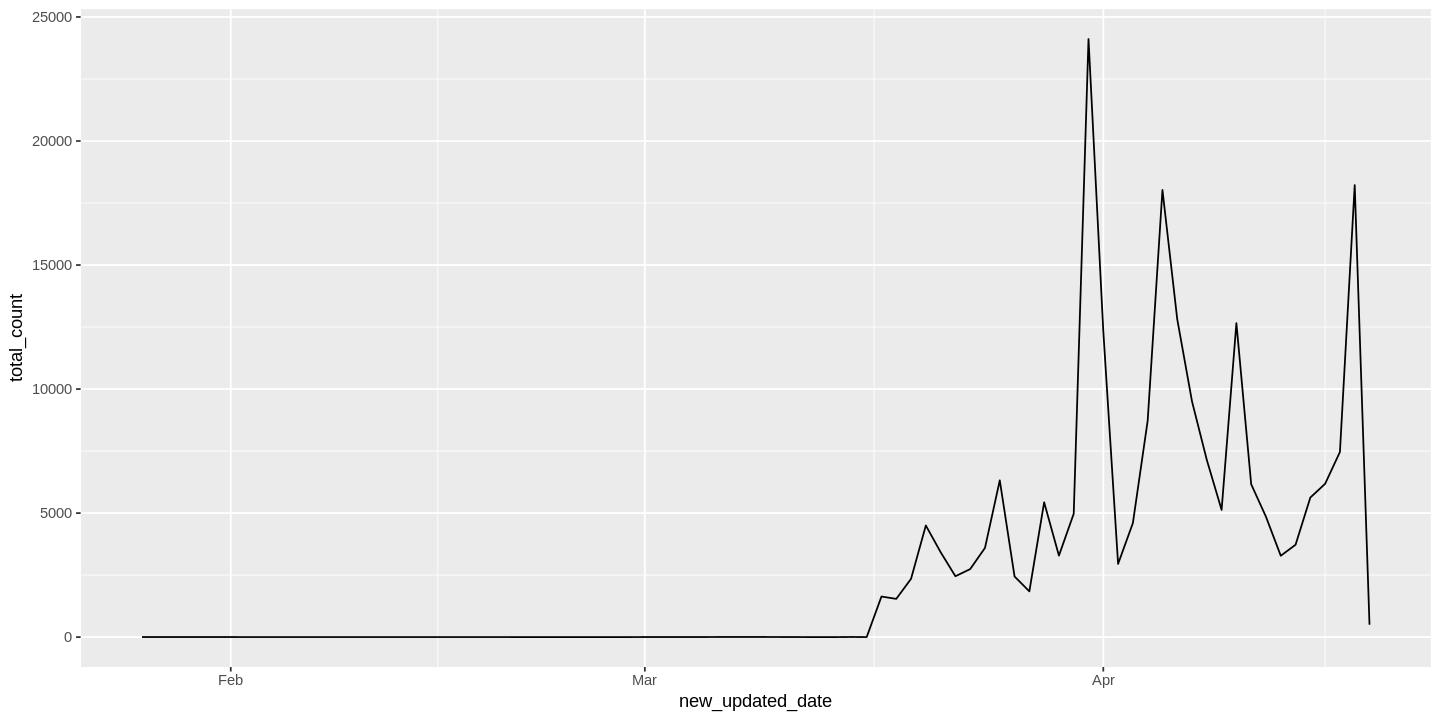

In [ ]:
ggplot(d.by_date, mapping = aes(x = new_updated_date, y = total_count)) +
  geom_line()

#Agregated data by state

In [ ]:
##Aggregated data by state

d.by_State <- data %>%
  group_by(state, property_type) %>%
  summarise(
    total_price = sum(price),
    total_count = sum(count),
  )

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


## No. of selling property by state

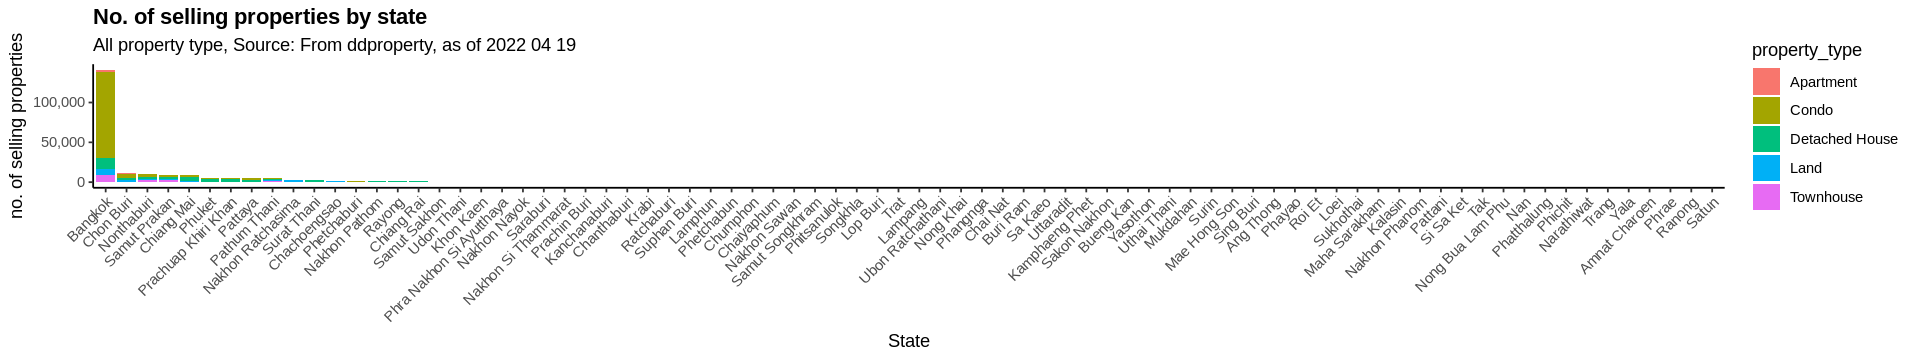

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 3, dpi = 600)

## No. of selling property by state
ggplot(d.by_State, mapping = aes(y = reorder(state, -total_count), x = total_count, fill = property_type)) +
  geom_col() +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +
  ##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "No. of selling properties by state",
       y = "State",
       x = "no. of selling properties",
       subtitle = "All property type, Source: From ddproperty, as of 2022 04 19 ")

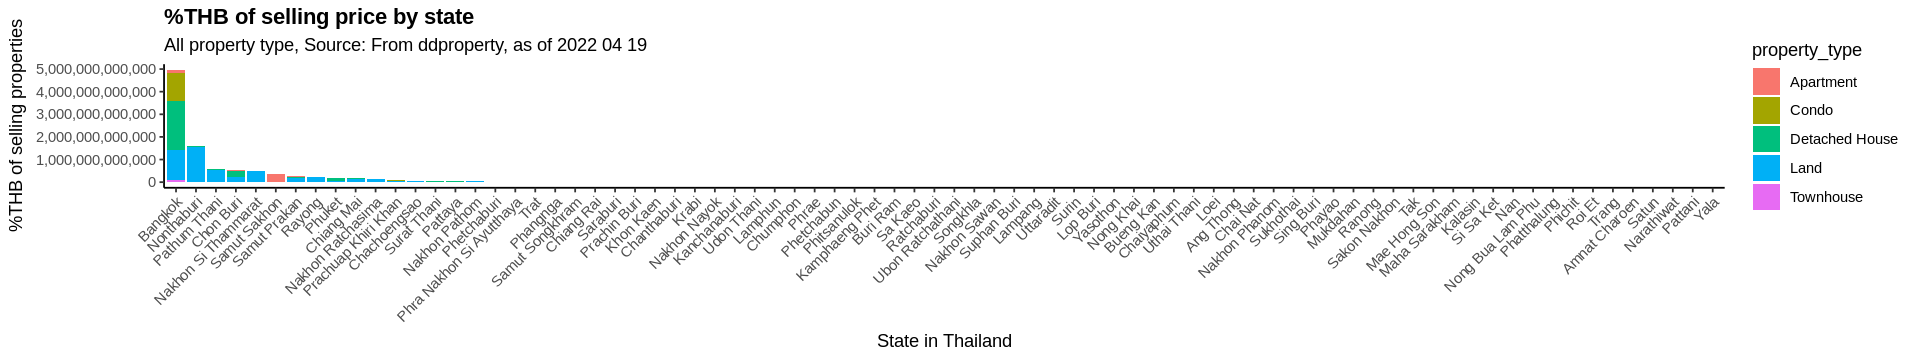

In [ ]:
## THB of selling price by state
ggplot(d.by_State, mapping = aes(y = reorder(state, -total_price), x = total_price, fill = property_type)) +
  geom_col() +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +
  ##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "%THB of selling price by state",
       y = "State in Thailand",
       x = "%THB of selling properties",
       subtitle = "All property type, Source: From ddproperty, as of 2022 04 19 ")

## % of selling property by state

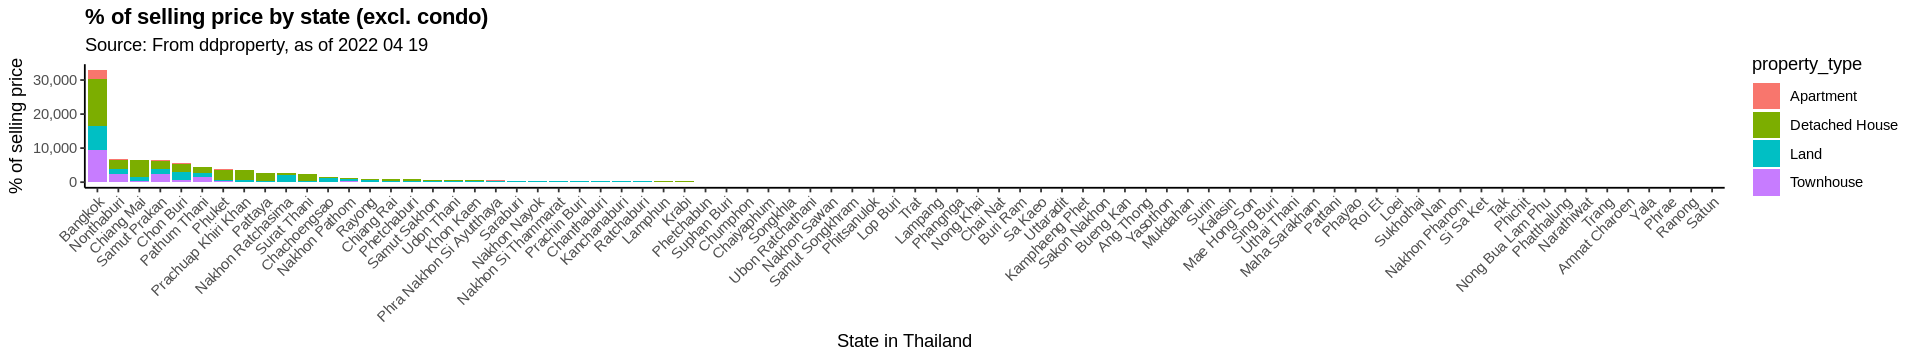

In [ ]:
## No. of selling property by state (excl. condo) (Coord_flip)

ggplot(subset(d.by_State, property_type != "Condo" ) ,mapping = aes(y = reorder(state, -total_count),
                                                      x = total_count, fill = property_type)) +
  geom_col() +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +
  ##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "% of selling price by state (excl. condo)",
       x = "% of selling price",
       y = "State in Thailand",
       subtitle = "Source: From ddproperty, as of 2022 04 19 ")

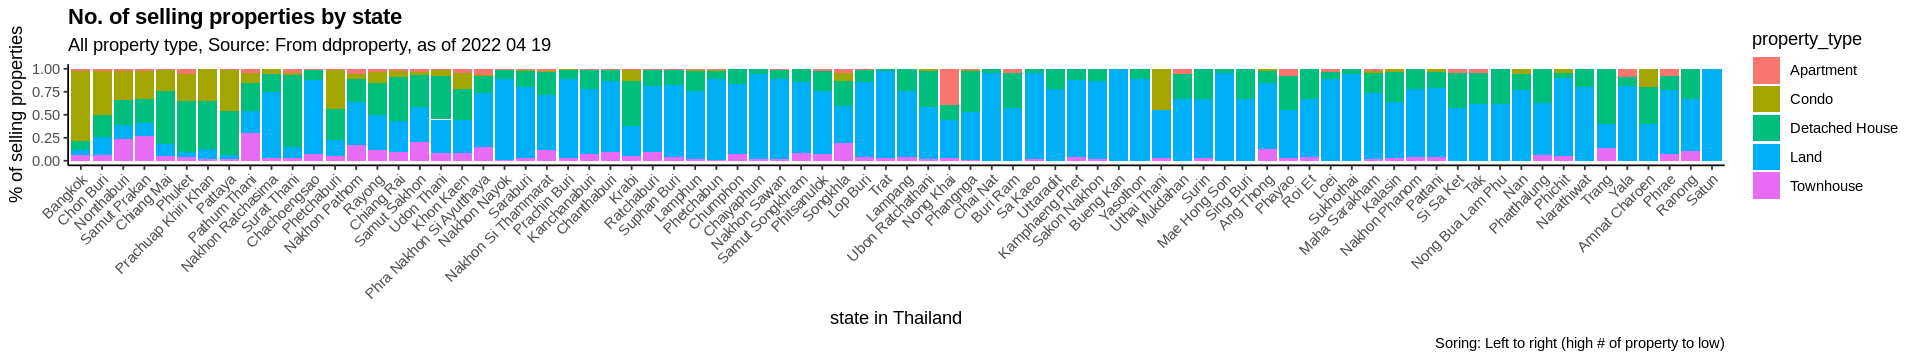

In [ ]:
## No. of selling property by state (excl. condo)
options(repr.plot.width = 16, repr.plot.height = 3, dpi = 600)

ggplot(d.by_State, mapping = aes(y = reorder(state, -total_count), x = total_count, fill = property_type)) +
  geom_col(position = "fill") +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +
  ##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "No. of selling properties by state",
       x = "% of selling properties",
       y = "state in Thailand",
       subtitle = "All property type, Source: From ddproperty, as of 2022 04 19 ",
       caption = "Soring: Left to right (high # of property to low)")

## no. of selling property by state (excl. condo)

## Property type overview

### Data preparation

In [ ]:
## data preparation
d.by_prop_type <- data %>%
  group_by(property_type) %>%
  summarise(
    total_price = sum(price),
    total_count = sum(count),
  )

d.by_prop_type <- d.by_prop_type %>%
  mutate(prop_count = round(total_count/sum(total_count)*100, digits = 2)) %>%  ##calculate proportion by count of selling properties
  mutate(prop_price = round(total_price/sum(total_price)*100, digits = 2))

head(d.by_prop_type)

property_type,total_price,total_count,prop_count,prop_price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apartment,5.481402e+11,4553,2.06,5.43
Condo,1.358067e+12,129129,58.55,13.45
Detached House,2.860700e+12,42721,19.37,28.34
Land,5.189334e+12,25457,11.54,51.40
Townhouse,1.393585e+11,18697,8.48,1.38


### Pie charts (count & price)

In [ ]:
## supply overview pie
options(repr.plot.width = 6, repr.plot.height = 4, dpi = 600)

pie_count <- ggplot(d.by_prop_type, mapping = aes (x = " ", y = prop_count, fill = property_type)) +
  geom_col() +
  geom_text(aes(label = prop_count)) +
  coord_polar(theta = "y") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)
                      ,limits = c(0,1)) +
  scale_fill_brewer(palette = "Set2") +

##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "No. of selling property by property type",
       x = " ",
       subtitle = "Source: From ddproperty, as of 2022 04 19 ")

pie_price <- ggplot(d.by_prop_type, mapping = aes (x = " ", y = prop_price, fill = property_type)) +
  geom_col() +
  geom_text(aes(label = prop_price)) +
  coord_polar(theta = "y") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)
                      ,limits = c(0,1)) +
  scale_fill_brewer(palette = "Set3") +


##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Total selling price by property type",
       x = " ",
       subtitle = "Source: From ddproperty, as of 2022 04 19 ")

print(pie_count)
print(pie_price)


### Column (count & price)

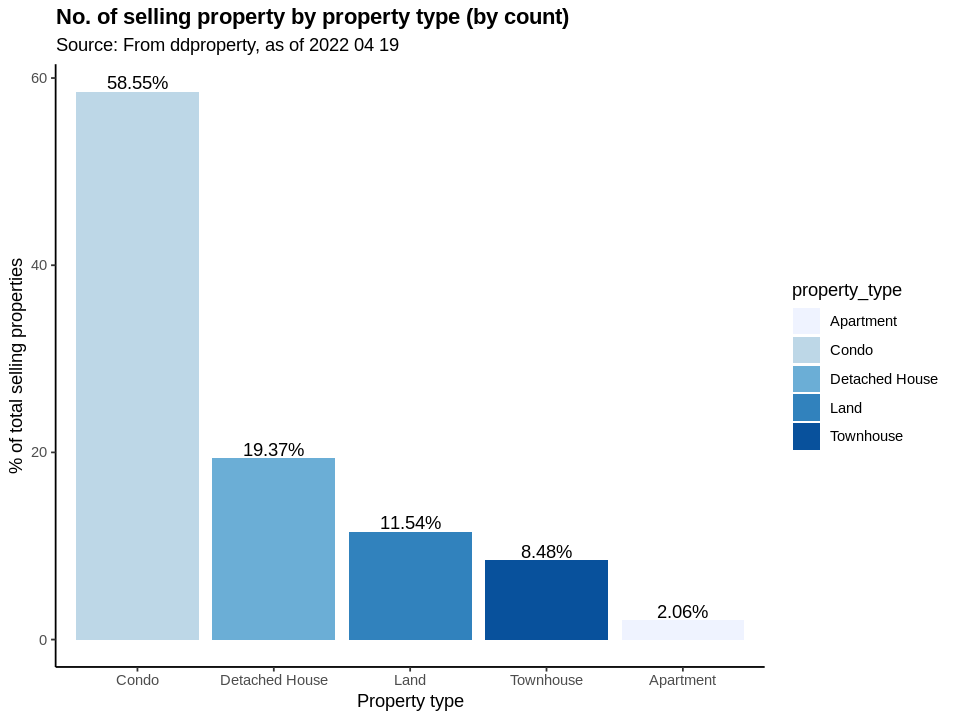

In [ ]:
#supply overview column - total count
options(repr.plot.width = 8, repr.plot.height = 6, dpi = 600)

 ggplot(d.by_prop_type, mapping = aes (x = reorder(property_type, - prop_count), y = prop_count, fill = property_type)) +
  geom_col(position = "Dodge") +
  geom_text(aes(label = paste0(prop_count, "%"), vjust = -0.2)) +
  scale_fill_brewer(palette = "Blues") +

##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "No. of selling property by property type (by count)",
      y = "% of total selling properties",
      x = "Property type",
       subtitle = "Source: From ddproperty, as of 2022 04 19 ")

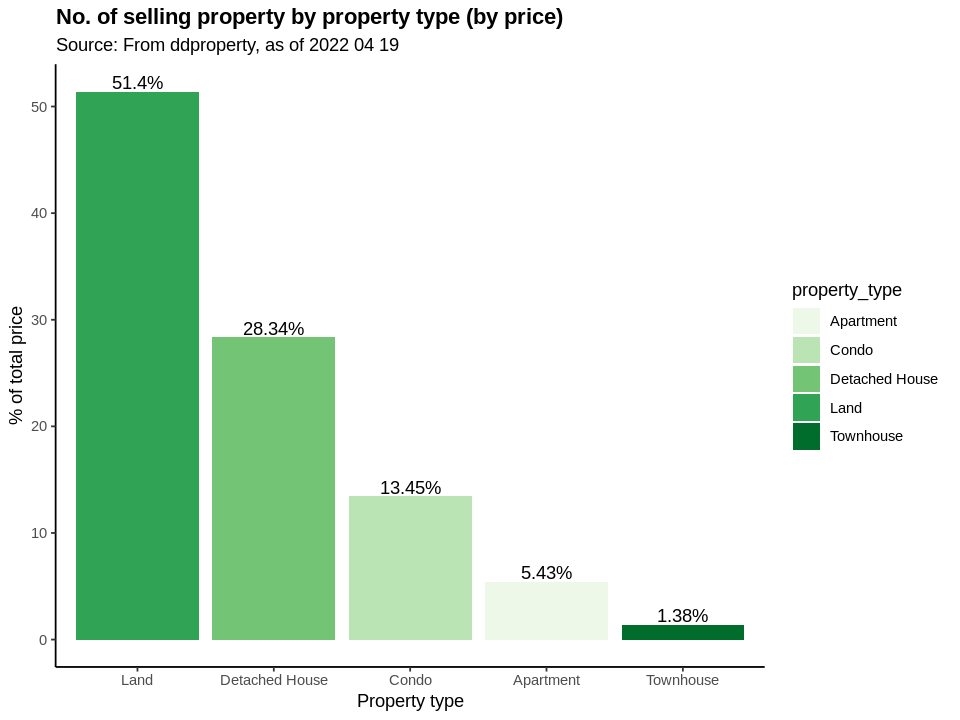

In [ ]:
#supply overview column - total sales
options(repr.plot.width = 8, repr.plot.height = 6, dpi = 600)

 ggplot(d.by_prop_type, mapping = aes (x = reorder(property_type, - prop_price), y = prop_price, fill = property_type)) +
  geom_col(position = "Dodge") +
  geom_text(aes(label = paste0(prop_price, "%"), vjust = -0.2)) +
   scale_fill_brewer(palette = "Greens") +

##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "No. of selling property by property type (by price)",
      y = "% of total price",
      x = "Property type",
       subtitle = "Source: From ddproperty, as of 2022 04 19 ")

Further analysis
*   Aggregated data by state
*   Property price by state

